In [1]:
#Problem statement
#Develop sentiment analysis model to classify restaurant reviews as positive or negative.

In [2]:
#Description
#With the rapid growth of online platforms for sharing opnions and reviews, restaurants often rely on the customer feedback to 
#improve their services and atrract the new customers.
#Analyzation
#Analaysing the sentiment of these reviews can provide the valuable insights into customer satisfaction.

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('Reviews.csv')

In [6]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [7]:
#Data Preprocessing - we can analyze the data
data.head() # head() - Top Five rows of the dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
data.tail() #tail() - Last Five rows of the dataset

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [9]:
data.info() #About the data columns and information about datset like datatype , memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
data.describe() #Statistical information of the dataset.

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [11]:
data.isnull().sum() #Checking the null values of the dataset.

Review    0
Liked     0
dtype: int64

In [12]:
data.duplicated() #Checking the duplicates in dataset.

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [13]:
#Checking the Value Counts or Votes
value_counts = data['Liked'].value_counts()
print(value_counts)

Liked
1    500
0    500
Name: count, dtype: int64


In [14]:
#Exploratory Data Analysis(EDA) - Dataset of format will be converted into pictorial With matplotlib , seaborn , wordcloud.

In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [16]:
#Seaborn is a visualization library for statistical graphics plotting in Python,
#built on top of Matplotlib and Pandas.
import matplotlib.pyplot as plt
import seaborn as sns

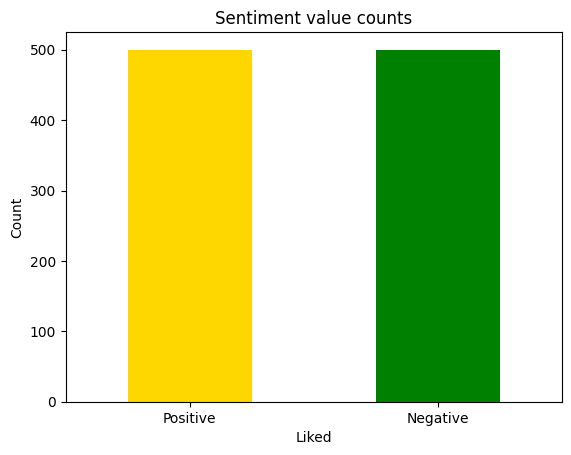

In [17]:
value_counts.plot(kind = 'bar' , color = ['gold','green'])
plt.title("Sentiment value counts")
plt.xlabel('Liked')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Positive','Negative'], rotation = 0)
plt.show()

In [18]:
from wordcloud import WordCloud #For Text Data Analysis

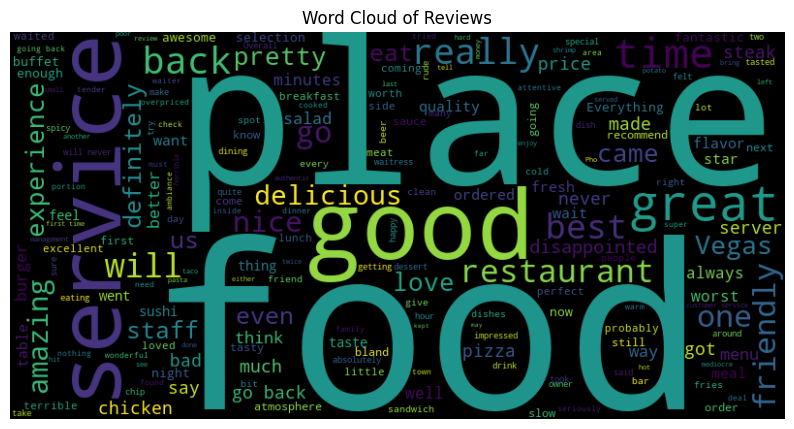

In [19]:
combined_text = " ".join(data['Review'])
wordcloud = WordCloud(width = 800 , height = 400 , background_color = 'black').generate(combined_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [20]:
from collections import Counter

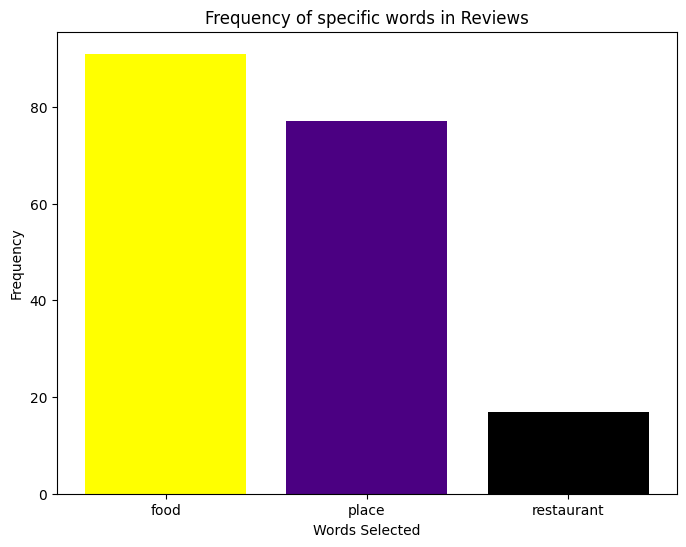

In [21]:
#Process of EDA to Explore the info within info.
target_words = ['food','place','restaurant']
all_words = " ".join(data['Review']).lower().split()
word_counts = Counter(all_words)
target_word_counts = {word:word_counts[word] for word in target_words}
plt.figure(figsize=(8,6))
plt.bar(target_word_counts.keys(), target_word_counts.values() , color = ['yellow','indigo','black'])
plt.xlabel('Words Selected')
plt.ylabel('Frequency')
plt.title('Frequency of specific words in Reviews')
plt.show()

In [22]:
#Text Pre-Processing
#convert data set into lower case

In [23]:
lowercased_text = data['Review'].str.lower()

In [24]:
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [25]:
#NLTK PUNKT is a module that can split a text into sentences
#using an unsupervised technique. 
import nltk
nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sankar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
#Tokenization - Whole sentence will converted into small piece of text
from nltk.tokenize import word_tokenize

In [27]:
data['Tokens'] = data['Review'].apply(word_tokenize)

In [28]:
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [30]:
data['Review'].value_counts()

Review
#NAME?                                                                                                                                    4
The food was terrible.                                                                                                                    2
I would not recommend this place.                                                                                                         2
I love this place.                                                                                                                        2
I won't be back.                                                                                                                          2
                                                                                                                                         ..
OMG, the food was delicioso!                                                                                                              1
There is noth

In [31]:
#Removing punctuation marks
import string

In [32]:
data['Review'] = data['Review'].str.replace(f"[{string.punctuation}]"," ",regex = True)

In [33]:
print(data['Review'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [34]:
data['Review'].value_counts()

Review
 NAME                                                                                                                                     4
I would not recommend this place                                                                                                          2
I love this place                                                                                                                         2
I won t be back                                                                                                                           2
Will not be back                                                                                                                          2
                                                                                                                                         ..
The burger    I got the  Gold Standard  a  17 burger and was kind of disappointed                                                         1
OMG  the food

In [35]:
#Removing the stop words like  - this, is , are , was
#Collection of text samples
#The NLTK corpus is a collection of text samples that have been curated to assist in linguistic research, machine learning, and natural language processing tasks. 
from nltk.corpus import stopwords

In [36]:
stop_words = set(stopwords.words('english'))

In [37]:
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

In [38]:
print(data['Tokens'])

0                                    [Wow, Loved, place]
1                                          [Crust, good]
2                           [Not, tasty, texture, nasty]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4                  [The, selection, menu, great, prices]
                             ...                        
995           [I, think, food, flavor, texture, lacking]
996                          [Appetite, instantly, gone]
997             [Overall, I, impressed, would, go, back]
998    [The, whole, experience, underwhelming, I, thi...
999    [Then, I, wasted, enough, life, poured, salt, ...
Name: Tokens, Length: 1000, dtype: object


In [39]:
#Stemming - Which takes the present tense form in V1(verb) form.
#ex : - (driving) to [drive] , (loved) to [love]
#It is the process of reducing the word into root word or base word form by removing suffix

In [40]:
#Stemming :
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [41]:
stemmer = PorterStemmer()

In [42]:
data['stemmed'] = data['Review'].apply(lambda x:' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

In [43]:
print(data['stemmed'])

0                                     wow love thi place
1                                      crust is not good
2                 not tasti and the textur wa just nasti
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                               appetit instantli gone
997        overal i wa not impress and would not go back
998    the whole experi wa underwhelm and i think we ...
999    then as if i hadn t wast enough of my life the...
Name: stemmed, Length: 1000, dtype: object


In [44]:
#Lemmatization - process of tranforming a word into its base or dictionary form
#ex : - better tranforms to good
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sankar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [46]:
lemmatizer = WordNetLemmatizer()

In [47]:
data['Lemmatized'] = data['Review'].apply(lambda x:' '.join([lemmatizer.lemmatize(word , pos = wordnet.VERB) for word in word_tokenize(x)]))

In [48]:
print(data['Lemmatized'])

0                                   Wow Loved this place
1                                      Crust be not good
2                Not tasty and the texture be just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                                Appetite instantly go
997       Overall I be not impress and would not go back
998    The whole experience be underwhelming and I th...
999    Then as if I hadn t waste enough of my life th...
Name: Lemmatized, Length: 1000, dtype: object


In [49]:
#Removing the numerical data from data set.(reviews)
#ex - The food is good i have visited 8 out of 10 times.(removing numbers)

In [50]:
import re
data['No Numbers'] = data['Review'].apply(lambda x : re.sub(r'\d+',' ',x))

In [51]:
print(data['No Numbers'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: No Numbers, Length: 1000, dtype: object


In [52]:
#Removing the special characters - @ , # , ! , *
data['cleaned'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]','' ,x)) 

In [53]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [54]:
#Expanding Method
# ex: Don't eat food in this hotel,
# when we apply expanded text it will convert into do not eat food in this hotel.

In [55]:
#Expanding the text
import contractions
data['Expanded'] = data['Review'].apply(contractions.fix)

In [56]:
print(data['Expanded'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Expanded, Length: 1000, dtype: object


In [57]:
#Removing Emojis - i like this food
!pip install emoji

In [58]:
#Removing emojis from the text
import emoji
data['emoji'] = data['Review'].apply(emoji.demojize)

In [59]:
print(data['emoji'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: emoji, Length: 1000, dtype: object


In [60]:
# Removing links from review_text
# Ex : - food is good vist [www.abchotel.in]

In [61]:
!pip install beautifulsoup4

In [62]:
#Beautiful Soup is a library that makes it easy to scrape information from web pages.
#It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree.
from bs4 import BeautifulSoup

In [63]:
#Last step of the Data Cleaning - removing the hypertext links
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())

In [64]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [65]:
#TF(Term Frequency) - IDF(Inverse Document Frequency)  Vectorizer
#Converting the all the text to matrices format (rows = documents , columns = terms)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [66]:
X = vectorizer.fit_transform(data['Review'])
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [67]:
#Building The Machine Learning Model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [68]:
vectorizer = TfidfVectorizer()

In [69]:
X = vectorizer.fit_transform(data['Review'])
y = data['Liked']

In [70]:
#random state will ensure data split in the same way
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [71]:
print(X_train,X_test,y_train,y_test)

  (0, 1778)	0.3196494189359375
  (0, 1938)	0.20794801889277578
  (0, 2005)	0.45560954528848707
  (0, 1516)	0.5587881819736206
  (0, 1527)	0.578582388550776
  (1, 263)	0.2799840341995038
  (1, 62)	0.5164170315313603
  (1, 1471)	0.27255492663992104
  (1, 613)	0.3202666685240094
  (1, 1180)	0.35549258822909835
  (1, 622)	0.4193390530637026
  (1, 711)	0.4193390530637026
  (2, 1938)	0.21704341786509082
  (2, 1571)	0.3198299691276987
  (2, 1618)	0.5102287539842273
  (2, 699)	0.3031291394604372
  (2, 1962)	0.48790050997574835
  (2, 1057)	0.5102287539842273
  (3, 1796)	0.18893179507753172
  (3, 1194)	0.2006808020306405
  (3, 1471)	0.29501353406759745
  (3, 590)	0.33614831815132157
  (3, 821)	0.37508854376741335
  (3, 1791)	0.3192733609259723
  (3, 719)	0.30305480231081033
  :	:
  (797, 1911)	0.46801741316672485
  (798, 63)	0.09941818111459709
  (798, 1938)	0.2228482091437908
  (798, 944)	0.14171411086951774
  (798, 1776)	0.1774987010047913
  (798, 1206)	0.14757149730549846
  (798, 890)	0.29074

In [72]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [73]:
y_pred = model.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test,y_pred)

In [75]:
report = classification_report(y_test,y_pred)

In [76]:
print(f'Accuracy {accuracy}')

Accuracy 0.8


In [77]:
print(f'Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [78]:
#Predict Sentiment for New Review
#Preprocess the new review
#Corrected function name
#Vectorize is converting a collection of text documents to a matrix of token counts
#Tokenization is a process of converting or splitting a sentences into singular words 
#which we can use in various programs like Natural Language Processing (NLP)
#Stop words is a commonly used word (such as “the”, “a”, “an”, or “in”)
#Stemming reduces word to base form
#Lemmatization reduce to v1 form(verb)
def preprocess_review(review):
    review = review.lower()
    review = BeautifulSoup(review,"html.parser").get_text()
    review = re.sub(f"[{string.punctuation}]"," ",review)
    review = contractions.fix(review)
    review = emoji.demojize(review)
    tokens = word_tokenize(review)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos = 'v') for word in tokens]
    cleaned_review = ' '.join(lemmatized_tokens)
    return cleaned_review

In [79]:
#Input Of New Review Prediction
new_review = input("Enter a review")
cleaned_review = preprocess_review(new_review)
new_review_vectorized = vectorizer.transform([cleaned_review])
prediction = model.predict(new_review_vectorized)
if prediction[0] == 1:
    print("The review is predicted positive")
else:
    print("The review is predicted negative")

Enter a review chicken is bad


The review is predicted negative


In [80]:
# Ensure you have the same vectorizer and model used during training
# vectorizer = ... (load or define your vectorizer)
# model = ... (load or define your trained model)

new_review = input("Enter a review: ")
cleaned_review = preprocess_review(new_review)  # Ensure this function is defined and consistent

# Transform the review using the trained vectorizer
new_review_vectorized = vectorizer.transform([cleaned_review])

# Predict using the trained model
prediction = model.predict(new_review_vectorized)

# Output the prediction
if prediction[0] == 1:
    print("The review is predicted positive")
else:
    print("The review is predicted negative")

Enter a review:  chicken is good


The review is predicted positive
